In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Normalization , Dense , InputLayer
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score, mean_absolute_percentage_error


# DATA PREPROCESSING

In [2]:
file = pd.read_csv("train.csv",delimiter=",")
print(file.shape)
file.head(5)



(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
tensor_data = tf.constant(file)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


# Shuffling

In [4]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[3.040000e+02, 5.443740e+05, 8.586580e+05, 6.000000e+00,
        5.839800e+04, 4.000000e+00, 4.000000e+00, 1.300000e+01,
        1.820000e+02, 1.010000e+02, 1.050000e+02, 4.653385e+05],
       [9.330000e+02, 5.284090e+05, 7.960460e+05, 3.000000e+00,
        1.081260e+05, 2.000000e+00, 1.000000e+01, 1.000000e+01,
        1.670000e+02, 8.800000e+01, 7.600000e+01, 2.798335e+05],
       [3.670000e+02, 5.483690e+05, 7.174410e+05, 5.000000e+00,
        6.783600e+04, 4.000000e+00, 1.000000e+00, 8.000000e+00,
        1.740000e+02, 9.400000e+01, 1.210000e+02, 3.607375e+05],
       [7.800000e+01, 5.746910e+05, 7.515130e+05, 2.000000e+00,
        1.147020e+05, 4.000000e+00, 5.000000e+00, 1.100000e+01,
        1.750000e+02, 6.100000e+01, 1.200000e+02, 2.065910e+05],
       [2.640000e+02, 5.297610e+05, 7.760020e+05, 6.000000e+00,
        1.321520e+05, 1.000000e+00, 5.000000e+00, 1.500000e+01,
        1.440000e+02, 8.000000e+01, 1.050000e+02, 1

# Input & Output

In [5]:
X = tensor_data[:,3:-1]
print(X[:5])
print(X.shape)

tf.Tensor(
[[6.00000e+00 5.83980e+04 4.00000e+00 4.00000e+00 1.30000e+01 1.82000e+02
  1.01000e+02 1.05000e+02]
 [3.00000e+00 1.08126e+05 2.00000e+00 1.00000e+01 1.00000e+01 1.67000e+02
  8.80000e+01 7.60000e+01]
 [5.00000e+00 6.78360e+04 4.00000e+00 1.00000e+00 8.00000e+00 1.74000e+02
  9.40000e+01 1.21000e+02]
 [2.00000e+00 1.14702e+05 4.00000e+00 5.00000e+00 1.10000e+01 1.75000e+02
  6.10000e+01 1.20000e+02]
 [6.00000e+00 1.32152e+05 1.00000e+00 5.00000e+00 1.50000e+01 1.44000e+02
  8.00000e+01 1.05000e+02]], shape=(5, 8), dtype=float32)
(1000, 8)


In [6]:
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)
print(y[:5])
print(y.shape)

tf.Tensor(
[[465338.5]
 [279833.5]
 [360737.5]
 [206591. ]
 [122225.5]], shape=(5, 1), dtype=float32)
(1000, 1)


# TRAINING

In [7]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
print(DATASET_SIZE)


1000


In [8]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train= y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)
print(y_train)

(800, 8)
(800, 1)
tf.Tensor(
[[465338.5]
 [279833.5]
 [360737.5]
 [206591. ]
 [122225.5]
 [547069. ]
 [216831.5]
 [496514. ]
 [356606.5]
 [377706.5]
 [432951.5]
 [357823. ]
 [315403.5]
 [218665.5]
 [230428.5]
 [175012.5]
 [190949. ]
 [240296.5]
 [179711.5]
 [286937.5]
 [158031.5]
 [125721.5]
 [155719. ]
 [289570.5]
 [242709.5]
 [486699. ]
 [183833.5]
 [271010.5]
 [294378.5]
 [405505. ]
 [ 98254. ]
 [283208. ]
 [480307. ]
 [385248.5]
 [240926. ]
 [237730. ]
 [207480.5]
 [234835.5]
 [243006.5]
 [471527.5]
 [357294. ]
 [479031. ]
 [410403.5]
 [293424.5]
 [430469. ]
 [238941. ]
 [332812. ]
 [295553.5]
 [389610. ]
 [555336.5]
 [459095. ]
 [284727.5]
 [526394. ]
 [301042.5]
 [216327. ]
 [400606.5]
 [197377.5]
 [135874. ]
 [275781. ]
 [365136.5]
 [226087.5]
 [287675. ]
 [422439.5]
 [531114.5]
 [110021.5]
 [201073. ]
 [328973.5]
 [218983.5]
 [158741.5]
 [212546.5]
 [508328.5]
 [418504. ]
 [340165. ]
 [385196. ]
 [422774.5]
 [232192. ]
 [331819.5]
 [274357.5]
 [295002. ]
 [468666. ]
 [376446. ]

In [9]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [10]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [11]:
# Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


# Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

# Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
for k,j in train_dataset:
    print(k,j)

In [ ]:
for k,j in val_dataset:
    print(k,j)

In [ ]:
for k,j in train_dataset:
    print(k,j)


# Normalization

In [ ]:
Normalizer = Normalization()
Normalizer.adapt(X_train)
Normalizer(X[:5])
# print(Normalizer(X[:5]))
# print(X[:5])

# Model 

In [16]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    Normalizer,
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1)
])
model.summary()
model.build()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               5

In [17]:
model.compile(optimizer=Adam(
    learning_rate=0.01
    ),
              loss=MeanAbsoluteError(),
              metrics=[RootMeanSquaredError()])


# Training

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Model training
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1, callbacks=[early_stopping, checkpoint])

In [19]:
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


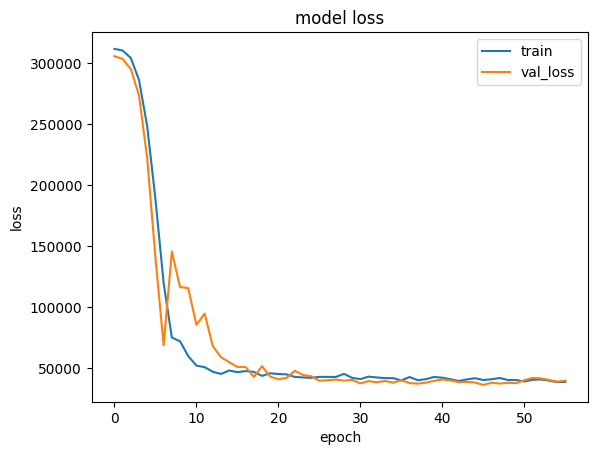

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

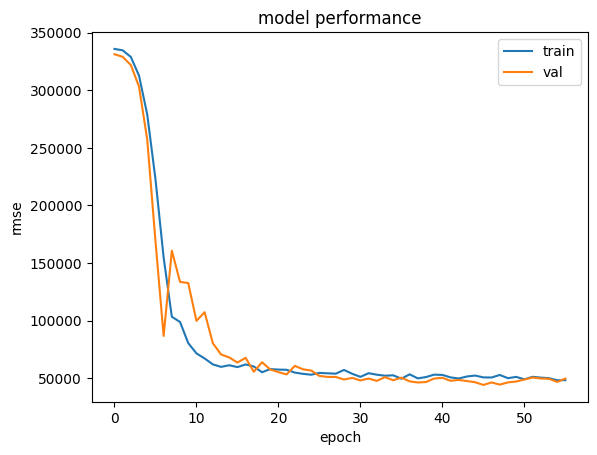

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()   

In [ ]:
history.history

In [ ]:
model.evaluate(X_test,y_test)

In [24]:
model.predict(tf.expand_dims(X_test[0], axis = 0))

1/1 [==============================] - 0s 105ms/step


array([[377219.88]], dtype=float32)

In [25]:
y_test[0]


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([420083.], dtype=float32)>

In [26]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])

4/4 [==============================] - 0s 1ms/step


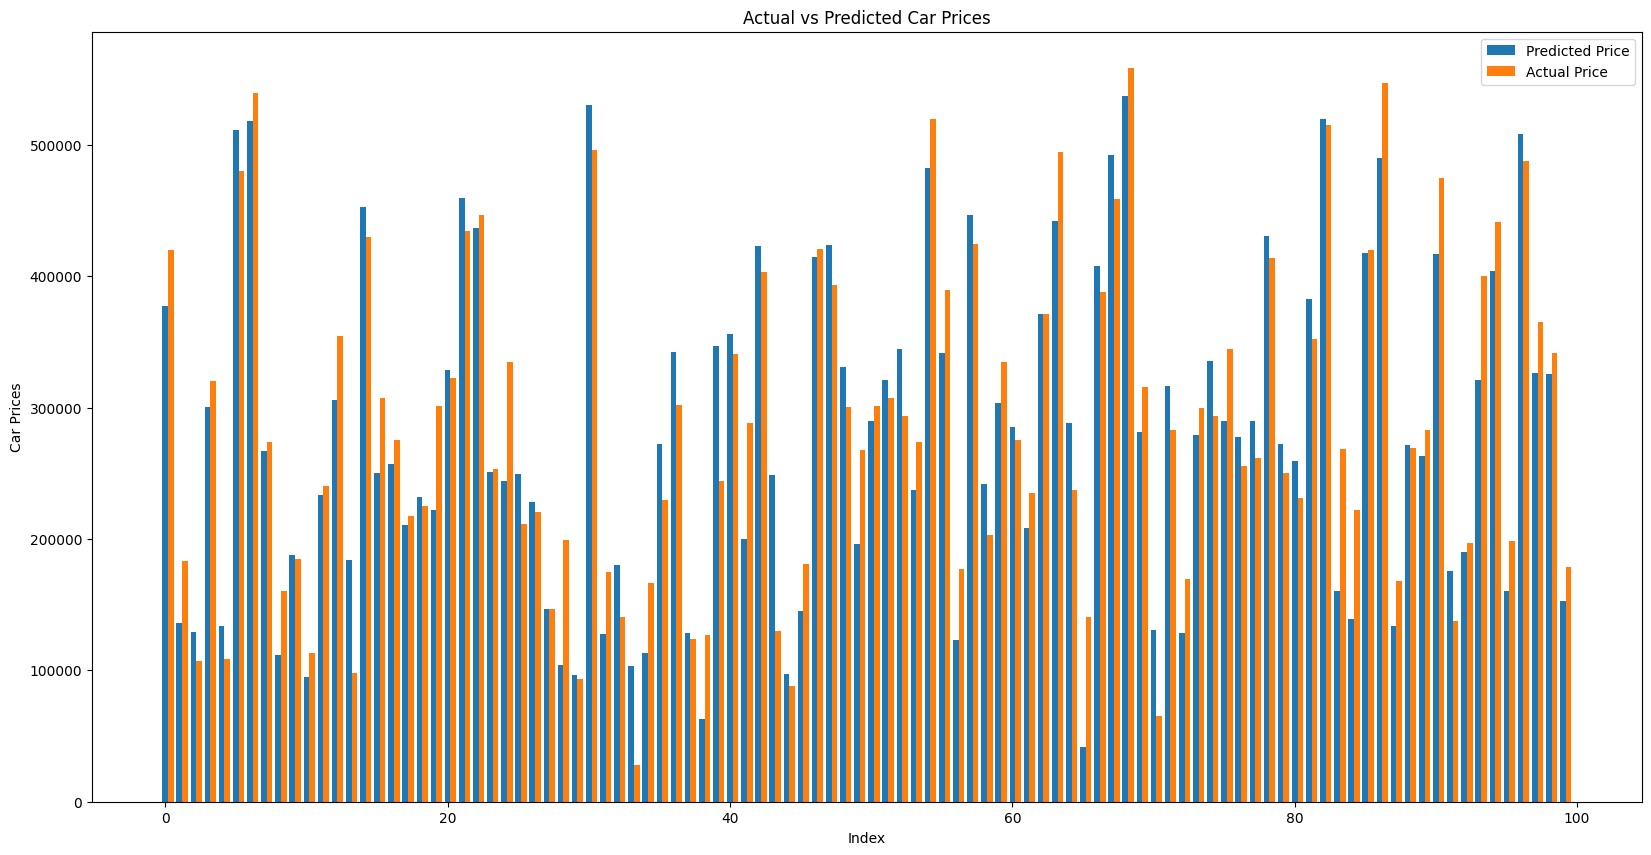

In [27]:
import numpy as np
# Plot the predicted vs actual prices
ind = np.arange(len(y_pred))
plt.figure(figsize=(20, 10))
width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Price')
plt.bar(ind + width, y_true, width, label='Actual Price')

plt.xlabel('Index')
plt.ylabel('Car Prices')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()

# Accuracy

In [28]:
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"R-squared Value: {r2}")
print(f"Mean absolute percentage error : {mape}")


R-squared (Accuracy): 0.8663838455601751
Mean Absolute Percentage Error (MAPE): 0.1856871098279953
